In [86]:
# 使用简单numpy实现GCN
import networkx as nx
from networkx import to_numpy_matrix
import matplotlib.pyplot as plt
import numpy as np

In [87]:
# 对网络G进行可视化

def plot_graph(G):
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    nx.draw_networkx(G, pos, edges=edges);
    nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), node_size=300, node_color='r', alpha=0.8)
    nx.draw_networkx_edges(G, pos, edgelist=edges,alpha =0.4)
    plt.show()

In [88]:
# 数据加载，构造图
G = nx.read_gml('dolphins.gml')
print(G)
print(type(G))


<class 'networkx.classes.graph.Graph'>


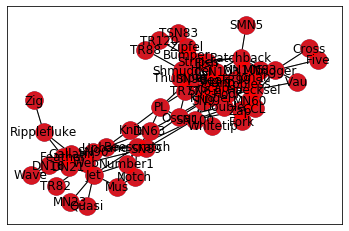

['Beak', 'Beescratch', 'Bumper', 'CCL', 'Cross', 'DN16', 'DN21', 'DN63', 'Double', 'Feather', 'Fish', 'Five', 'Fork', 'Gallatin', 'Grin', 'Haecksel', 'Hook', 'Jet', 'Jonah', 'Knit', 'Kringel', 'MN105', 'MN23', 'MN60', 'MN83', 'Mus', 'Notch', 'Number1', 'Oscar', 'Patchback', 'PL', 'Quasi', 'Ripplefluke', 'Scabs', 'Shmuddel', 'SMN5', 'SN100', 'SN4', 'SN63', 'SN89', 'SN9', 'SN90', 'SN96', 'Stripes', 'Thumper', 'Topless', 'TR120', 'TR77', 'TR82', 'TR88', 'TR99', 'Trigger', 'TSN103', 'TSN83', 'Upbang', 'Vau', 'Wave', 'Web', 'Whitetip', 'Zap', 'Zig', 'Zipfel']


In [89]:
# 可视化
plot_graph(G)
print(list(G.nodes()))
# print(G.nodes['Beak']['value'])
# print(G.nodes)
# print(G.nodes[:,'value'])

In [90]:
# 构建GCN， 计算A_hat和D_hat矩阵
order = sorted(list(G.nodes()))
# 按字母顺序排序
print(order)

['Beak', 'Beescratch', 'Bumper', 'CCL', 'Cross', 'DN16', 'DN21', 'DN63', 'Double', 'Feather', 'Fish', 'Five', 'Fork', 'Gallatin', 'Grin', 'Haecksel', 'Hook', 'Jet', 'Jonah', 'Knit', 'Kringel', 'MN105', 'MN23', 'MN60', 'MN83', 'Mus', 'Notch', 'Number1', 'Oscar', 'PL', 'Patchback', 'Quasi', 'Ripplefluke', 'SMN5', 'SN100', 'SN4', 'SN63', 'SN89', 'SN9', 'SN90', 'SN96', 'Scabs', 'Shmuddel', 'Stripes', 'TR120', 'TR77', 'TR82', 'TR88', 'TR99', 'TSN103', 'TSN83', 'Thumper', 'Topless', 'Trigger', 'Upbang', 'Vau', 'Wave', 'Web', 'Whitetip', 'Zap', 'Zig', 'Zipfel']


In [91]:
A = to_numpy_matrix(G, nodelist=order)
# 邻接矩阵
print('A=\n', A)

A=
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [92]:
# 生成对角矩阵
I = np.eye(G.number_of_nodes())
A_hat = A + I
print('A_hat=\n', A_hat)

A_hat=
 [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 0. 1.]]


In [93]:
# D_hat为A_hat的度矩阵
D_hat = np.array(np.sum(A_hat, axis=0))[0]
print('D_hat=\n', D_hat)

D_hat=
 [ 7.  9.  5.  4.  2.  5.  7.  6.  7.  8.  6.  2.  2.  9. 13.  8.  7. 10.
  8.  5. 10.  7.  2.  4.  7.  4.  4.  6.  6.  6. 10.  2.  4.  2.  8. 12.
  9.  3.  9.  6.  7. 11.  6.  8.  3.  7.  2.  3.  8.  5.  3.  5. 12. 11.
  8.  3.  3. 10.  2.  6.  2.  4.]


In [94]:
# 得到对角线上的元素
D_hat = np.matrix(np.diag(D_hat))
print('D_hat=\n', D_hat)

D_hat=
 [[7. 0. 0. ... 0. 0. 0.]
 [0. 9. 0. ... 0. 0. 0.]
 [0. 0. 5. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 6. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 4.]]


In [95]:
# 初始化权重，normal正态分布 loc均值 scale标准差
W_1 = np.random.normal(loc=0, scale=1, size=(G.number_of_nodes(),20))
W_2 = np.random.normal(loc=0, size=(W_1.shape[1], 10))
print('W_1=\n', W_1)
print('W_2=\n', W_2)

W_1=
 [[ 0.71954479  1.54160358 -0.32352171 ... -0.36367671  1.28987577
   0.15437865]
 [-0.29803041 -0.51405313  1.627399   ...  0.5542575  -1.6403366
   0.86731403]
 [ 0.31270958 -0.5610697   0.4646894  ...  0.71345654  0.45700026
   1.5713768 ]
 ...
 [ 0.13378228  0.37063121 -1.14341346 ...  0.00453138  1.38921914
  -2.60598865]
 [ 0.76923128  0.91663914  0.2963804  ... -0.28817492 -0.83000292
  -0.0334889 ]
 [-0.09468077  1.4734826   0.05029956 ...  0.06141502 -1.04640023
  -0.26615211]]
W_2=
 [[-0.22383766  0.35848105  1.11967043 -0.84607383 -0.61726742  0.4110783
   0.61148419 -1.19823189  0.59541875  0.33799031]
 [-0.96871671 -1.194197   -0.62115733 -0.13890564 -1.61793455 -1.1631266
   1.0123466   0.50045769 -0.2943481  -1.89490803]
 [ 0.99679771  1.82807101 -0.19490034  0.05212868 -0.10858829 -0.48975212
  -0.42556265 -0.14864844  0.56963482 -1.76298864]
 [ 0.14248921  2.23697579 -0.4490584  -2.41439979  0.50462405 -0.23848986
  -0.22760864 -1.36248834 -0.14833296 -0.31577166]

In [96]:
# x<0时 结果=0; x>=0时，结果=x
def relu(x):
    return(abs(x)+x)/2

In [97]:
# 叠加GCN层， 这里只使用单位矩阵作为特征表征，即每个节点被表示为一个one-hot编码的类别变量
def gcn_layer(A_hat, D_hat, X, W):
    return relu(D_hat**-1 * A_hat * X * W)
H_1 = gcn_layer(A_hat, D_hat, I, W_1)
H_2 = gcn_layer(A_hat, D_hat, H_1, W_2)
output = H_2
print('output=\n', output)
# 提取特征表征
feature_representations = {}
nodes = list(G.nodes())
for i in range(len(nodes)):
    feature_representations[nodes[i]] = np.array(output)[i]
print('feature_representations=\n', feature_representations)


output=
 [[3.84021037e-01 1.47222010e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.99403985e-01 3.65649009e-03]
 [0.00000000e+00 1.04262443e+00 1.10517377e-01 0.00000000e+00
  0.00000000e+00 0.00000000e+00 3.69813185e-01 0.00000000e+00
  4.33962309e-01 0.00000000e+00]
 [0.00000000e+00 1.89621414e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.76555576e-01 0.00000000e+00
  6.83942030e-01 0.00000000e+00]
 [0.00000000e+00 8.84925299e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 5.25544179e-01 0.00000000e+00 8.78125826e-02
  0.00000000e+00 7.13659203e-01]
 [3.51476043e-01 9.21199395e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.07663657e-02 3.60415572e-02]
 [0.00000000e+00 7.21025282e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 7.32559373e-01 0.00000000e+00 0.

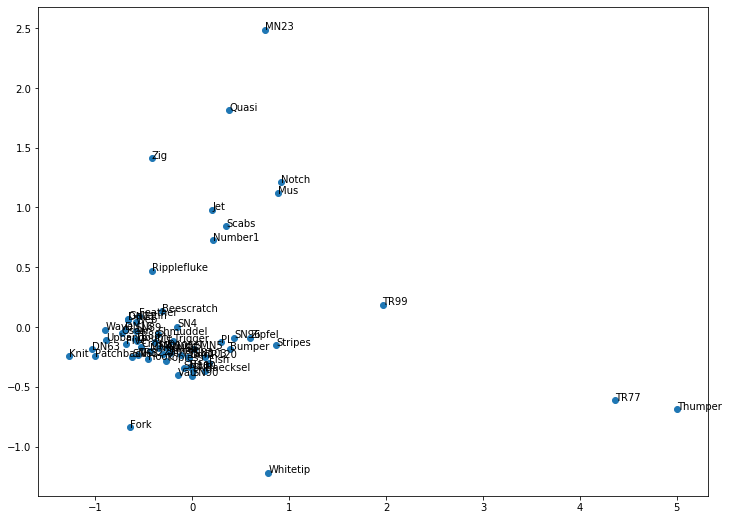

In [98]:
from sklearn.decomposition import PCA
# 在二维空间中绘制所选节点的向量
def plot_nodes(word_list):
    # 每个节点的embedding为100维
    X = []
    for item in word_list:
        X.append(feature_representations[item])
    #print(X.shape)
    # 将100维向量减少到2维
    pca = PCA(n_components=2)
    result = pca.fit_transform(X) 
    #print(result)
    # 绘制节点向量
    plt.figure(figsize=(12,9))
    # 创建一个散点图的投影
    plt.scatter(result[:, 0], result[:, 1])
    for i, word in enumerate(list(word_list)):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))        
    plt.show()
    
plot_nodes(feature_representations)